
# Fundamentals of Returns:

* Average return is not a good way to look at how an asset behaves! 
* Volatility is not taken into account
* Because the average return is the same it doesnt' mean that you are going to end up with the same amount of money

## (1 + r)-Format
* Reutrn on  asset is the difference in the prices:
  $$ R_{t, t+1} = \frac{P_{t+1}- P_t}{P_t} $$
* For simplicity sake, we are going to use the (1+r) format with $1 + R = \frac{P_{t+1}}{P_t}$. 
* So instead of 20% rate of return we will talk about 1,2 rate of return, and instead of 9%

## Dividend

* Add it back to $P_{t+1}$ -> This is what the *total return*
* When computing returns or in doing performance analysis always remember to use the total return:

$$ R_{t, t+1} = \frac{P_{t+1} + D_{t+1} - P_t}{P_t} $$

* The formula with dividend is known as *price return*

## Multi-Period Return

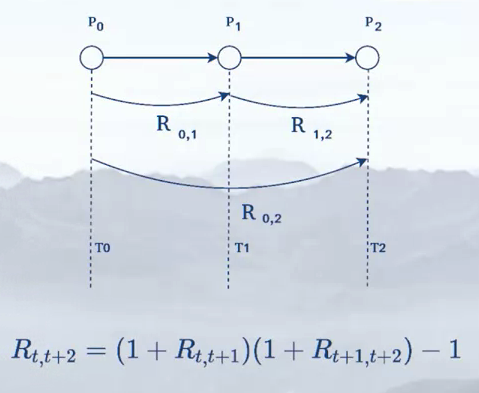

## Annualizing Returns

$$R = ((1 + R_m)^{N/m} - 1) $$

For instance: 
* Return over the month is 1%
* Annualized return: $((1+0.01)^{12} - 1)$ = $12.68%$

## Lab Session

In [2]:
import pandas as pd

In [4]:
# Let's create some prices of two items over 5 periods
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                      "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
                      })
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [7]:
# Different possibilities to calculate the rate of return
# 1.
prices / prices.shift(1) - 1

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [8]:
# When shifting with one row, the prices of the previous period get aligned
# with the prices of the next period
prices.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


`NaN` or not a number, since there are no data before index 0.

In [9]:
# 2.
# There is a method that does just that
# This what we are going to use in the future, since it is the easiest way!
prices.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [3]:
# Let's load a csv file to work with
prices = pd.read_csv('../data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [11]:
# compute rate of returns
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


<AxesSubplot:title={'center':'Prices'}>

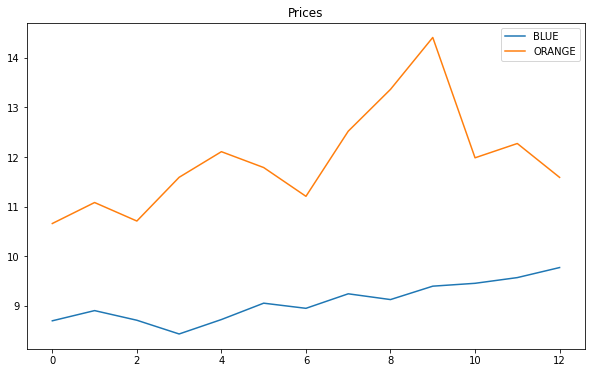

In [24]:
prices.plot(title="Prices", figsize=(10,6))

<AxesSubplot:title={'center':'Returns'}>

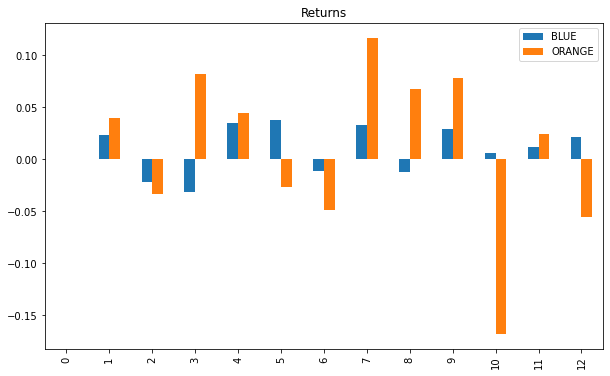

In [25]:
# Let's look at the rates
returns.plot.bar(title="Returns", figsize=(10, 6))

In [26]:
# We can see from above, that Orange prices are  more volatile than blue
# Let's check that with the standard deviation
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [27]:
# It is 3.5x larger than Blue
# and the mean:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [29]:
# Let's compound the Series of returns
# Remember: compounding is multiplying the (1 + r) of every period
# 1. Using numpy:
import numpy as np
np.prod(returns + 1) - 1


BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [31]:
# Pandas has it's own prod method
# No need to import numpy
(returns + 1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [34]:
# In percent:
(((returns + 1).prod() - 1)*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

In [35]:
# Annualization
# monthly return of:
rm = 0.01

(1 + rm)**12

1.1268250301319698

In [36]:
# Remember! That was the 1 + r format
# The annualized return is:
(1 + rm)**12 - 1

0.12682503013196977

In [38]:
# in case of daily returns
rd = 0.0001
( 1 + rd)**252 -1

0.025518911987694626